# Impact of Education Spending on Singapore's Economic Landscape
## 1. Introduction
As I began my exploration of Singapore's economic landscape, I came across a quote from the Organisation for Economic Co-operation and Development (2010) that struck a chord: "From Singapore’s beginning, education has been seen as central to building both the economy and the nation. The objective was to serve as the engine of human capital to drive economic growth." 

These words preceded the OECD's exploration into Singapore's transformation from a developing country to a modern industrial economy. Needless to say, they ignited my curiosity to delve deeper into the **relationship between the country's education spending and its economic growth**. That newfound curiosity is why I started this project! In today's world, where knowledge is increasingly valued as the currency of progress, understanding this relationship goes beyond academic interest—it is a practical necessity.

**I hypothesise that increased investment in education**, as evidenced by higher government expenditure in this area, **will positively correlate with higher levels of economic growth**, as measured by Singapore's Gross Domestic Product (GDP). This hypothesis stems from my belief that a well-educated workforce contributes to productivity gains and innovation.

By analysing available data, including GDP and educational indicators—namely student-to-teacher ratios, enrolment rates, and highest qualifications attained—I aim to uncover the direct impact of education spending on Singapore's economy.

## 2. Data Collection and Preparation
In the upcoming sections: I will analyse the government's expenditure on education and its impact on various educational indicators, followed by an examination of how these indicators affect Singapore's economic landscape. 

**Below is an overview of the datasets I will be using, sourced entirely from the Singapore Department of Statistics:**<br>1. Students And Teachers In Educational Institutions, Annual<br>2. Enrolment In Educational Institutions, Annual<br>3. Singapore Residents Aged 25 Years & Over By Highest Qualification Attained, Sex And Age Group, Annual<br>4. GDP In Chained (2015) Dollars, By Industry (SSIC 2020), Annual<br>5. Government Expenditure On Education, Annual

I will start by prepping the datasets and converting each one to the correct file extension (from .xlsx to .csv). These datasets actually come in CSV as well, but I thought it would be a fun challenge to convert them from Excel.

### A. Data Preparation

In [1]:
# Import necessary libraries
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import os


# Convert Excel files to CSV
def convert_to_csv(file_path, csv_folder):
    excel_df = pd.read_excel(file_path)
    
    # Replace file extension from .xlsx to .csv
    csv_path = os.path.join(csv_folder, os.path.splitext(os.path.basename(file_path))[0] + '.csv')
    excel_df.to_csv(csv_path, index=False)
    return csv_path


# Path of 'excel' and 'csv' folders
excel_folder = "../beginner_data_analysis/data/excel"
csv_folder = "../beginner_data_analysis/data/csv"                                         

# Append all Excel files, i.e. files with .xlsx extension, into excel_files
excel_files = []
for file in os.listdir(excel_folder):
    if file.endswith('.xlsx'):
        excel_files.append(file)

# Use the newly defined function to convert the Excel files and append them into csv_files
csv_files = []
for file in excel_files:
    csv_files.append(convert_to_csv(os.path.join(excel_folder, file), csv_folder))
    
# Load the new CSV files into the 'csv' folder
dataframes = []
for file in csv_files:
    
    # Specify the first rows as the header
    csv_df = pd.read_csv(file, header=0)  
    dataframes.append(csv_df)

All the Excel files have been successfully converted! Upon inspecting the dataframes, I noticed several missing values indicated by 'na'. Fortunately, these values fall outside the range I plan to analyse; however, the extensive year range and unimportant rows make the data messy and hard to navigate.

Here is the first dataframe for reference:

In [2]:
# First dataframe = index 0
dataframes[0]

,Data Series (number),2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
0,Total Enrolment,660139,663367,656369,654937,654006,657321,651408,661184,668586,...,524084,519819,518954,523123,523290,523666,526617,519481,519318,519349
1,Primary Schools,235116,233882,232650,235039,234414,235754,238140,239102,241683,...,262465,260109,257757,257690,259117,261399,268668,277875,288494,290604
2,Secondary Schools,162208,162731,162071,161831,165124,171180,179753,185855,189996,...,155832,156746,160542,165829,168103,171617,173538,163590,164374,161263
3,Junior Colleges,25231,25349,26005,27532,29012,29252,28442,29559,31613,...,24663,27224,29214,31729,32082,29508,27598,24699,21471,19205
4,Institute Of Technical Education,27570,27862,27825,27968,28367,28508,27519,29295,28036,...,15117,15181,15769,17133,16999,16166,14496,13404,9036,17132
5,Arts Institutions,4822,4724,4757,4939,5160,5147,4901,4600,4441,...,na,na,na,na,na,na,na,na,na,na
6,Polytechnics,79448,85444,87621,87089,85186,82994,82808,85562,87636,...,na,na,na,na,na,na,na,na,na,na
7,National Institute Of Education,2935,2724,2847,2909,2998,2865,3263,3317,3853,...,na,na,na,na,na,na,na,na,na,na
8,Universities,122809,120651,112593,107630,103745,101621,86582,83894,81328,...,na,na,na,na,na,na,na,na,na,na


### B. Data Cleaning
To prevent memory errors caused by excessive data, I will reduce the size of dataframes[0] by subsetting specific columns. Since one of the datasets only includes data up to 2021, I will standardise the range of years to span from 2012 to 2021 across all dataframes.

Also, I will update the header of the first column to something more descriptive.

In [3]:
# Ensure any changes made would not affect the original dataframe
enrolment_data, govt_expenditure_data, real_gdp_data, highest_qualification_data, student_teacher_data = [duplicate_df.copy() for duplicate_df in dataframes]

# Replace specific text in the column names using regular expressions
enrolment_data.columns = enrolment_data.columns.str.replace("Data Series \(number\)", "Enrolment by Institution", regex=True)

# Define subsets by subsetting (column-wise)
years_to_keep = [str(year) for year in range(2012, 2022)]
enrolment_data = enrolment_data[["Enrolment by Institution"] + years_to_keep]

To streamline the analysis, I will combine all institutions, excluding Primary and Secondary Schools, into a single category named Post-Secondary Institutions. Additionally, I will relocate the second row, which represents the total figures, to the bottom for better organisation. 

It is important to note that the data for primary and secondary schools, junior colleges, and universities excludes private institutions.

In [4]:
# Define post-secondary categories
post_secondary_categories = ['Junior Colleges', 'Institute Of Technical Education', 'Arts Institutions', 'Polytechnics', 'National Institute Of Education', 'Universities']

# Filter out rows corresponding to post-secondary institutions
enrol_post_secondary = enrolment_data[enrolment_data['Enrolment by Institution'].isin(post_secondary_categories)]

# Aggregate figures for the combined category
enrol_combined_category = enrol_post_secondary.sum().to_frame().transpose()

# Create a new row for the combined category
enrol_combined_category['Enrolment by Institution'] = 'Post-Secondary Institutions'

# Concatenate the combined category with the original dataframe
enrolment_data = pd.concat([enrolment_data, enrol_combined_category], ignore_index=True)

# Remove original rows corresponding to the combined categories
enrolment_data = enrolment_data[~enrolment_data['Enrolment by Institution'].isin(post_secondary_categories)]

# Move the second row to the last row
enrolment_data = pd.concat([enrolment_data.iloc[1:], enrolment_data.iloc[:1]], ignore_index=True)

After everything, Dataframes[0], or enrolment_data, looks like this:

In [5]:
enrolment_data

,Enrolment by Institution,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Primary Schools,252735,244045,241683,239102,238140,235754,234414,235039,232650,233882
1,Secondary Schools,202520,197165,189996,185855,179753,171180,165124,161831,162071,162731
2,Post-Secondary Institutions,230586,233824,236907,236227,233515,250387,254468,258067,261648,266754
3,Total Enrolment,685841,675034,668586,661184,651408,657321,654006,654937,656369,663367


I will repeat the same process with the remaining 4 dataframes. For govt_expenditure_data, I will update the column header; subset columns to reduce the year range; combine all institutions into a single category ("Post-Secondary Institutions") just like enrolment_data; and move the second row to the last one.

In [6]:
#---------------govt_expenditure_data---------------#

# Replace specific text in the column names using regular expressions
govt_expenditure_data.columns = govt_expenditure_data.columns.str.replace("Data Series \(\$'000\)", "Expenditure by Institution ($'000)", regex=True)

# Define subsets by subsetting (column-wise)
govt_expenditure_data = govt_expenditure_data[["Expenditure by Institution ($'000)"] + years_to_keep]

# Filter out rows, aggregate figures, create a new row and remove original rows 
govt_post_secondary = govt_expenditure_data[govt_expenditure_data["Expenditure by Institution ($'000)"].isin(post_secondary_categories)]
govt_combined_category = govt_post_secondary.sum().to_frame().transpose()

govt_combined_category["Expenditure by Institution ($'000)"] = 'Post-Secondary Institutions'
govt_expenditure_data = pd.concat([govt_expenditure_data, govt_combined_category], ignore_index=True)
govt_expenditure_data = govt_expenditure_data[~govt_expenditure_data["Expenditure by Institution ($'000)"].isin(post_secondary_categories)]

# Move the second row to the last row
govt_expenditure_data = pd.concat([govt_expenditure_data.iloc[1:], govt_expenditure_data.iloc[:1]], ignore_index=True)

For real_gdp_data, I will update the column header; subset columns to reduce the year range; and filter rows to retain only the chained-dollar (2015) GDP figures. I believe this subset of the dataframe is the most relevant to the analysis.

In [7]:
#-------------------real_gdp_data-------------------#

# Replace specific text in the column names using regular expressions
real_gdp_data.columns = real_gdp_data.columns.str.replace("Data Series \(\$'000,000\)", "GDP by Industry ($'000,000)", regex=True)

# Define subsets by subsetting (column-wise)
real_gdp_data = real_gdp_data[["GDP by Industry ($'000,000)"] + years_to_keep]

# Define subsets by subsetting (row-wise)
real_gdp_data = real_gdp_data.head(1)

For highest_qualification_data, I will update the column header; subset columns to reduce the year range; and subset rows so that only the qualifications are left. Irrelevant information, such as sex and age range, is removed.

In [8]:
#-------------highest_qualification_data------------#

# Replace specific text in the column names using regular expressions
highest_qualification_data.columns = highest_qualification_data.columns.str.replace("Data Series \(number\)", "Qualifications", regex=True)

# Define subsets by subsetting (column-wise)
highest_qualification_data = highest_qualification_data[["Qualifications"] + years_to_keep]

# Filter rows to keep
qualification_rows_to_keep = [
    'Below Secondary',
    'Secondary',
    'Post-Secondary (Non-Tertiary)',
    'Diploma & Professional Qualification',
    'University'
]

# Filter the dataframe to keep only the specified rows
# Reset index to 0
highest_qualification_data = highest_qualification_data[highest_qualification_data['Qualifications'].isin(qualification_rows_to_keep)]
highest_qualification_data.reset_index(drop=True, inplace=True)

For student_teacher_data, I will update the column header; subset columns to reduce the year range; and subset rows so that only the total-teacher and total-student figures are left.

In [9]:
#----------------student_teacher_data---------------#

# Replace specific text in the column names using regular expressions
student_teacher_data.columns = student_teacher_data.columns.str.replace("Data Series \(number\)", "Students/Teachers", regex=True)

# Define subsets by subsetting (column-wise)
student_teacher_data = student_teacher_data[["Students/Teachers"] + years_to_keep]

# Filter rows to keep (student_teacher_data)
student_teacher_rows_to_keep = ['Total Students', 'Total Teachers']

# Filter the dataframe to keep only the specified rows
# Reset index to 0
student_teacher_data = student_teacher_data[student_teacher_data['Students/Teachers'].isin(student_teacher_rows_to_keep)]
student_teacher_data.reset_index(drop=True, inplace=True)

The cleaning is complete! Before proceeding with the visualisations, I need to make sure that the dataframes have the right data types first.

In [10]:
# Convert object columns to the appropriate dtypes
enrolment_data = enrolment_data.convert_dtypes()
govt_expenditure_data = govt_expenditure_data.convert_dtypes()

real_gdp_data = real_gdp_data.convert_dtypes()

# Use 'pd.to_numeric' because not all values convert to float
for col in real_gdp_data.columns[1:]:
    real_gdp_data[col] = pd.to_numeric(real_gdp_data[col], errors='coerce').astype(float)

highest_qualification_data = highest_qualification_data.convert_dtypes()

student_teacher_data = student_teacher_data.convert_dtypes()

# Use 'pd.to_numeric' because not all values convert to integer
for col in student_teacher_data.columns[1:]:
    student_teacher_data[col] = pd.to_numeric(student_teacher_data[col], errors='coerce').astype('Int64')

### C. Finalised Dataframes
Finally, all 5 dataframes look like this:

In [11]:
# Thousands separator is purely for display purposes!
# Update dataframes again
dataframes = [enrolment_data, govt_expenditure_data, real_gdp_data, highest_qualification_data, student_teacher_data]

# Apply formatting to each dataframe and display them
for df in dataframes:
    if df.equals(real_gdp_data):
        # Apply formatting with a precision of 1 decimal place only for real_gdp_data
        display(df.style.format(thousands=",", precision=1))
    else:
        display(df.style.format(thousands=","))

,Enrolment by Institution,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Primary Schools,"252,735","244,045","241,683","239,102","238,140","235,754","234,414","235,039","232,650","233,882"
1,Secondary Schools,"202,520","197,165","189,996","185,855","179,753","171,180","165,124","161,831","162,071","162,731"
2,Post-Secondary Institutions,"230,586","233,824","236,907","236,227","233,515","250,387","254,468","258,067","261,648","266,754"
3,Total Enrolment,"685,841","675,034","668,586","661,184","651,408","657,321","654,006","654,937","656,369","663,367"


,Expenditure by Institution ($'000),2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Development Expenditure,"859,599","973,445","886,013","699,215","656,660","611,092","446,986","791,099","493,000","305,131"
1,Recurrent Expenditure:,"9,637,312","10,664,868","10,712,445","11,235,741","11,812,194","12,079,538","12,429,006","11,932,177","11,766,853","12,604,777"
2,Primary Schools,"1,946,159","2,185,580","2,263,510","2,457,901","2,563,211","2,731,770","2,823,567","2,738,444","2,674,257","2,944,535"
3,Secondary Schools,"2,314,237","2,523,528","2,607,555","2,705,620","2,764,946","2,791,373","2,787,630","2,714,153","2,560,404","2,755,277"
4,Post-Secondary Institutions,"5,376,916","5,955,760","5,841,380","6,072,220","6,484,037","6,556,395","6,817,809","6,479,580","6,532,192","6,904,965"
5,Total Government Expenditure,"10,496,911","11,638,313","11,598,458","11,934,956","12,468,854","12,690,630","12,875,992","12,723,276","12,259,853","12,909,908"


,"GDP by Industry ($'000,000)",2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,GDP In Chained (2015) Dollars,"377,449.0","395,633.1","411,203.4","423,444.1","438,640.0","458,435.5","474,559.2","480,942.3","462,330.8","507,134.2"


,Qualifications,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Below Secondary,"848,200","833,300","832,100","800,000","819,300","813,800","761,500","745,700","757,800","643,900"
1,Secondary,"499,800","501,200","502,500","519,200","500,400","488,800","511,200","503,700","484,300","492,600"
2,Post-Secondary (Non-Tertiary),"239,400","232,400","238,000","250,500","249,800","253,500","260,700","265,900","296,900","281,300"
3,Diploma & Professional Qualification,"364,600","372,600","401,800","405,500","411,500","415,900","434,900","461,200","456,800","486,200"
4,University,"674,400","729,700","758,100","775,800","814,200","874,000","908,700","946,200","982,000","1,074,300"


,Students/Teachers,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Total Students,"685,841","675,034","668,586","661,184","651,408","657,321","654,006","654,937","656,369","663,367"
1,Total Teachers,"44,331","46,211","48,845","49,052","49,842","50,775","51,288","51,179","51,274","51,133"


## 3. Analysis of Government Expenditure on Education
In this section, I will explore the trend of total government expenditure on education in Singapore. I will also delve into the patterns in development and recurrent expenditure within the education sector, investigating notable changes in funding allocation among the different educational institutions.

### A. Total Government Expenditure Trend

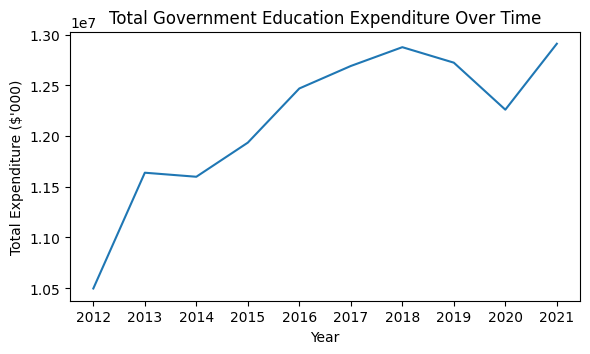

In [12]:
# Extract the years
years = govt_expenditure_data.columns[1:]

# Extract the expenditure values
total_govt_exp = govt_expenditure_data.iloc[-1, 1:].values
development_exp = govt_expenditure_data.iloc[0, 1:].values
recurrent_exp = govt_expenditure_data.iloc[1, 1:].values

# Plot the trend for total government expenditure
plt.figure(figsize=(6, 3.8))
plt.plot(years, total_govt_exp, linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel("Total Expenditure ($'000)")
plt.title('Total Government Education Expenditure Over Time')

# Show the plot
plt.tight_layout()
plt.show()

The consistent upward trend in total government expenditure from 2012 to 2021 reflects a steadfast commitment to investing in education. The substantial increase observed from 2012 to 2013, surpassing even the growth witnessed after the economic impact of COVID-19 from 2020 to 2021, underscores a period of robust investment in education infrastructure and programmes. 

Despite the remarkable increase over the year, the slight decrease in expenditure from 2013 to 2014 raises questions about potential shifts in funding priorities or economic constraints during that period. However, the subsequent recovery and peak expenditure in 2018, followed by another peak in 2021, suggest a resurgence of investment in education.

The noticeable trough in expenditure in 2020, coinciding with the global pandemic, underscores the immediate impact of COVID-19 on government spending priorities. The subsequent rebound in expenditure in 2021 signals a concerted effort to bolster the education sector and mitigate the adverse effects of the pandemic on learning outcomes and workforce development.

### B. Development and Recurrent Expenditure Trends

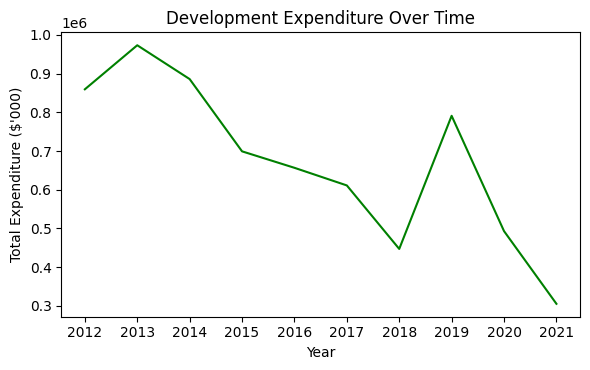

In [13]:
# Plot the trend for development expenditure
plt.figure(figsize=(6, 3.8))
plt.plot(years, development_exp, linestyle='-', color='green')

# Add labels and title
plt.xlabel('Year')
plt.ylabel("Total Expenditure ($'000)")
plt.title('Development Expenditure Over Time')

# Show the plot
plt.tight_layout()
plt.show()

The above line plot depicting development expenditure reveals a notable downward trend over the years. Although there was a period of increase from 2012 to 2013, coinciding with the overall increase in total government expenditure, development expenditure has been on a consistent downward trajectory since then. 

Of particular note is the trough observed in 2018, despite total government expenditure reaching its second highest peak the same year. This decline suggests a shift in government allocation towards recurrent expenditure. Another noteworthy aspect is the substantial peak witnessed in 2019, though there is not much to say about this because development expenditure has experienced a marked decline since.

The lowest figure observed in 2021 contrasts with the highest peak in total government expenditure, further indicating a shift towards allocating more resources to recurrent expenditure rather than development projects.

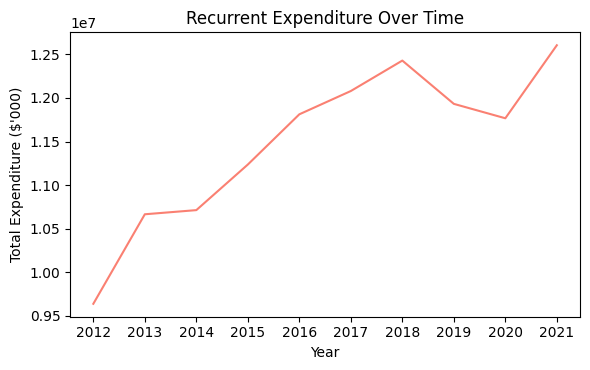

In [14]:
# Plot the trend for development expenditure
plt.figure(figsize=(6, 3.8))
plt.plot(years, recurrent_exp, linestyle='-', color='salmon')

# Add labels and title
plt.xlabel('Year')
plt.ylabel("Total Expenditure ($'000)")
plt.title('Recurrent Expenditure Over Time')

# Show the plot
plt.tight_layout()
plt.show()

The first thing that stands out to me when looking at the above line plot is how similar the shape for recurrent expenditure is to the total government expenditure plot. Both show comparable trends: an overall increasing trajectory, a secondary peak in 2018, a trough in 2020 due to the impact of COVID-19, and the highest peak recorded in 2021.

The peak in recurrent expenditure observed in 2018, alongside the trough in development expenditure the same year supports the previously established notion of a shift in expenditure allocation. This observation indicates a deliberate reallocation of funds from development projects to recurrent expenses.

### C. Focus on Make-up of Total Government Expenditure

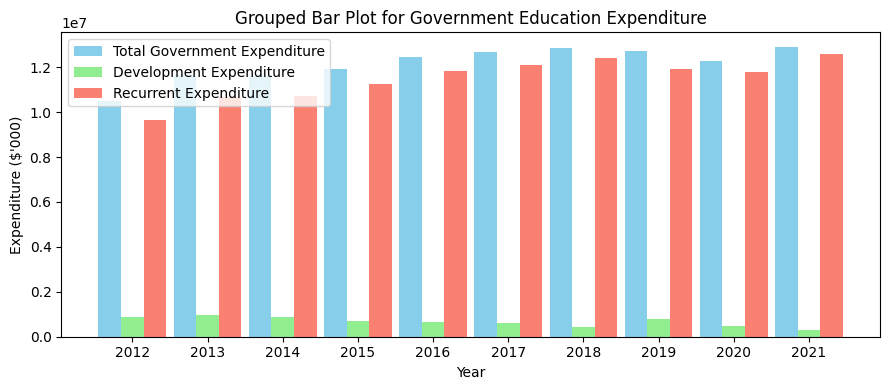

In [15]:
# Set the width of the bars
bar_width = 0.3

# Set the x locations for the groups
index = np.arange(len(years))

# Plot the grouped bar plot
plt.figure(figsize=(9, 4))
plt.bar(index, total_govt_exp, bar_width, label='Total Government Expenditure', color="skyblue")

# Plot the development_exp bar next to the total_govt_exp bar
plt.bar(index + bar_width, development_exp, bar_width, label='Development Expenditure', color="lightgreen")

# Plot the recurrent_exp bar next to the development_exp bar
plt.bar(index + 2 * bar_width, recurrent_exp, bar_width, label='Recurrent Expenditure', color="salmon")

# Add labels and title
plt.xlabel('Year')
plt.ylabel("Expenditure ($'000)")
plt.title('Grouped Bar Plot for Government Education Expenditure')
plt.xticks(index + bar_width, years)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

The above grouped bar plot reveals that recurrent expenditure makes up a large part of total government spending on education. This indicates a significant focus on maintaining day-to-day operations and essential services within educational institutions. Additionally, the emphasis on recurrent expenditure underscores the commitment to sustaining the quality and efficiency of existing educational infrastructure and programmes, hence ensuring the continuous delivery of education to students. 

In contrast, the relatively lower allocation of funds towards development expenditure signals a potential limitation in investments directed towards the long-term improvement, expansion, or innovation of educational facilities and programmes. The disparity between recurrent and development expenditure prompts consideration of the balance needed to support both the ongoing provision of educational services and the long-term enhancement of the education system.

### D. Recurrent Expenditure Breakdown

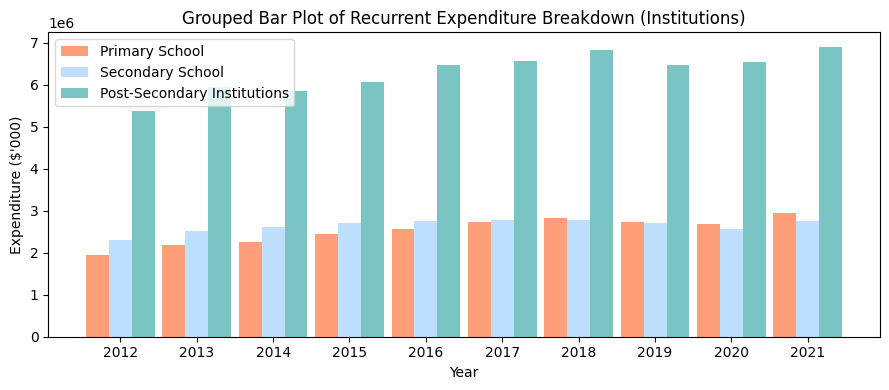

In [16]:
# Data for recurrent expenditure breakdown by institution
primary_sch_exp = govt_expenditure_data.iloc[2, 1:].values
secondary_sch_exp = govt_expenditure_data.iloc[3, 1:].values
post_secondary_exp = govt_expenditure_data.iloc[4, 1:].values

# Set the width of the bars
bar_width = 0.3

# Plot the grouped bar plot
plt.figure(figsize=(9, 4))
plt.bar(index, primary_sch_exp, bar_width, label='Primary School', color='#FF9F7A')
plt.bar(index + bar_width, secondary_sch_exp, bar_width, label='Secondary School', color='#BFDFFF')
plt.bar(index + 2 * bar_width, post_secondary_exp, bar_width, label='Post-Secondary Institutions', color='#7BC4C4')

# Add labels and title
plt.xlabel('Year')
plt.ylabel("Expenditure ($'000)")
plt.title('Grouped Bar Plot of Recurrent Expenditure Breakdown (Institutions)')
plt.xticks(index + bar_width, years)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Examining the breakdown of recurrent expenditure, it is evident that a significant allocation is directed towards post-secondary institutions. After all, increased spending serves to incentivise further studies by reducing financial barriers, enhancing facilities, and improving the overall quality of education. 

By making higher education more accessible and attractive, the government encourages individuals to pursue advanced studies beyond the secondary level. This strategic decision reflects an investment in the future workforce and economy, and the government's aim to cultivate a skilled, adaptable workforce capable of driving innovation and economic growth.

### E. Summary
Government spending on education has consistently increased over the years. However, it sharply declined in 2020 due to the impact of COVID-19. Despite this setback, there was a noticeable recovery in 2021, indicating the government's commitment to supporting education despite challenges.

In recent years, more funds have been directed towards recurrent expenditure. This means that a significant portion of the budget has been allocated to maintaining existing educational infrastructure and programmes, particularly in post-secondary institutions.

The government's focus on post-secondary institutions makes sense: increased spending encourages further education by enhancing its quality, making higher education more accessible and appealing, therefore motivating individuals to pursue advanced studies beyond the secondary level. This investment aligns with the government's goal of fostering a skilled, adaptable workforce capable of driving innovation and economic growth.

In contrast, the relatively lower allocation of funds towards development expenditure may suggest missed opportunities for significant improvements in the education system.

## 4. Analysis of Educational Indicators
In this section, I will focus on analysing key educational indicators to gain insights into the state and development of Singapore's education sector. By examining enrolment rates, highest qualifications attained, and student-teacher ratios, I aim to understand the dynamics and trends within Singapore's educational landscape. 

### A. Total Enrolment Trend

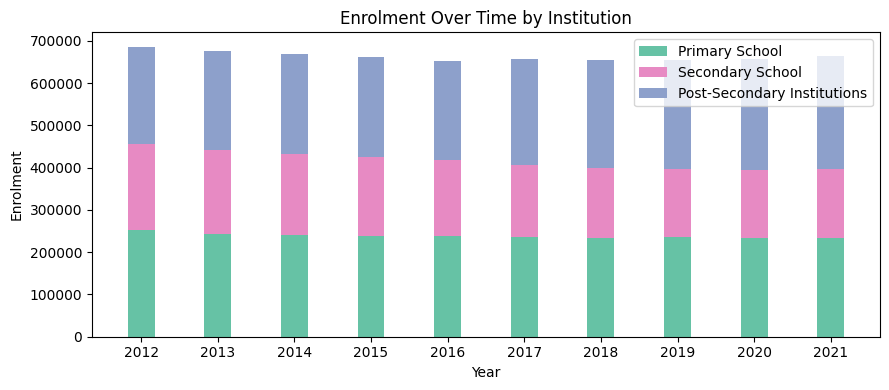

In [17]:
# Extracting the years
years = enrolment_data.columns[1:].values

# Extracting the enrolment data for each category
primary_school_enrol = enrolment_data.iloc[0, 1:].values
secondary_school_enrol = enrolment_data.iloc[1, 1:].values
post_secondary_enrol = enrolment_data.iloc[2, 1:].values
total_enrolment = enrolment_data.iloc[3, 1:].values

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r = np.arange(len(years))

# Plotting the data
plt.figure(figsize=(9, 4))
plt.bar(r, primary_school_enrol, color='#66c2a5', width=bar_width, label='Primary School')
plt.bar(r, secondary_school_enrol, bottom=primary_school_enrol, color='#e78ac3', width=bar_width, label='Secondary School')
plt.bar(r, post_secondary_enrol, bottom=primary_school_enrol+secondary_school_enrol, color='#8da0cb', width=bar_width, label='Post-Secondary Institutions')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Enrolment')

plt.title('Enrolment Over Time by Institution')
plt.xticks(r, years)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

Despite declining primary school enrolment figures, primary school enrolments actually make up a consistent proportion of total enrolment across all 10 years. Conversely, secondary school enrolments consistently represent the smallest proportion of total enrolment, supported by its declining figures, indicating a smaller cohort of students entering secondary education. 

This could potentially be due to dropouts between the primary and secondary school levels, or migration to other countries. Post-secondary enrolments are increasing both in proportion to total enrolment and in raw figures, reflecting a growing recognition of the importance of higher education or vocational training in today's competitive landscape (where advanced skills and qualifications are increasingly valued by employers).

Total enrolment appears to be quite consistent, but further analysis using a line plot should provide more insight into any changes over time.

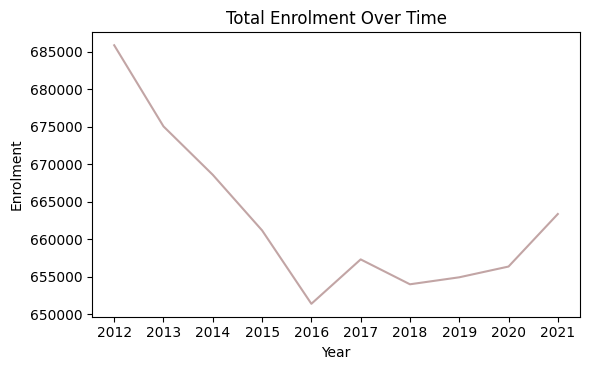

In [18]:
# Plotting the data
plt.figure(figsize=(6, 3.8))
plt.plot(years, total_enrolment, label='Total Enrollment', color='#c2a5a5')
plt.title('Total Enrolment Over Time')
plt.xlabel('Year')

plt.ylabel('Enrolment')
plt.tight_layout()
plt.show()

Now, I have a more obvious representation of the total enrolment trend! The trend reveals a fluctuating pattern over the years, with a notable decline observed since its peak in 2012. Particularly, enrolment figures hit a low point in 2016, followed by a modest increase in 2017, albeit short-lived as enrolment figures dipped again in 2018. 

Despite subsequent incremental increases, the overall enrolment levels have yet to rebound to the peak observed in 2012. Possible factors contributing to this phenomenon could include changes in birth rates and migration patterns.

### B. Highest Qualification Attained Trend

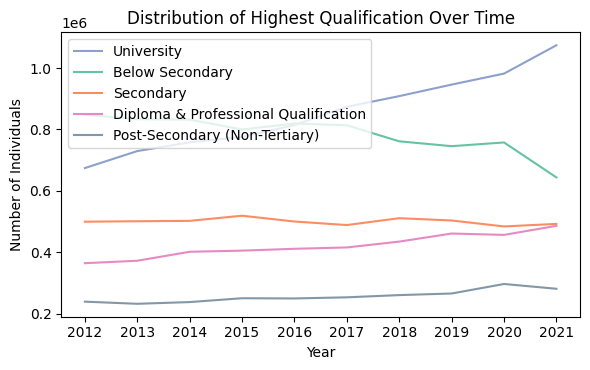

In [19]:
# Extract the years
years = highest_qualification_data.columns[1:]
plt.figure(figsize=(6, 3.8))

# Extracting the highest qualifications data for each category
below_sec_qualification = highest_qualification_data.iloc[0, 1:].values
sec_qualification = highest_qualification_data.iloc[1, 1:].values
post_sec_qualification = highest_qualification_data.iloc[2, 1:].values
diploma_qualification = highest_qualification_data.iloc[3, 1:].values
uni_qualification = highest_qualification_data.iloc[4, 1:].values

# Plotting the data
plt.plot(years, uni_qualification, label="University", color='#8da0cb')
plt.plot(years, below_sec_qualification, label="Below Secondary", color='#66c2a5')
plt.plot(years, sec_qualification, label="Secondary", color='#fc8d62')
plt.plot(years, diploma_qualification, label="Diploma & Professional Qualification", color='#e78ac3')
plt.plot(years, post_sec_qualification, label="Post-Secondary (Non-Tertiary)", color='#8397a7')

# Adding labels and title
plt.title('Distribution of Highest Qualification Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Individuals')
plt.legend()
plt.tight_layout()
plt.show()

The above distribution of highest qualifications over the past decade reveals a significant uptick in individuals obtaining university qualifications, indicating a societal shift towards valuing tertiary education. This trend underscores the increasing demand for skilled professionals across diverse sectors and highlights the pivotal role of higher education in shaping career prospects and fostering economic development.

Conversely, there is a declining trend observed in the distribution of below secondary qualifications, intersecting with the rise in university qualifications around 2016. This intersection marks a turning point where the proportion of individuals having attained below secondary qualifications begins to decrease as the number of university graduates continues to grow. 

This shift reflects evolving educational priorities, with individuals increasingly opting for higher levels of education to enhance their skill sets and workforce opportunities. Moreover, diploma & professional qualifications and post-secondary (non-tertiary) consistently exhibit the lowest distribution. 

This suggests a trend where individuals achieving these qualifications often pursue further education at the university level, emphasising a societal inclination towards tertiary education as a means of personal and professional advancement.

### C. Student-Teacher Ratio Trend

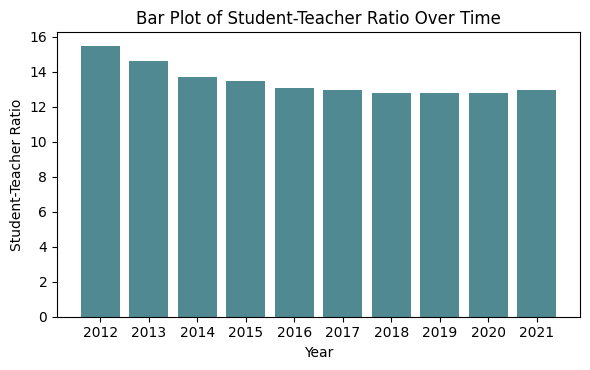

In [20]:
# Calculate the student-teacher ratio for each year
student_teacher_ratio = student_teacher_data.iloc[0, 1:] / student_teacher_data.iloc[1, 1:]

# Plotting the trend of the student-teacher ratio over time using a bar plot
plt.figure(figsize=(6, 3.8))
plt.bar(student_teacher_ratio.index, student_teacher_ratio, color="#508991")
plt.title('Bar Plot of Student-Teacher Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Student-Teacher Ratio')
plt.tight_layout()
plt.show()

The above bar plot illustrates the student-teacher ratio over the years, representing the number of students each teacher is responsible for. From 2012 to 2021, there is a consistent downward trend in the ratio. This trend suggests potential improvements in education resources and teacher allocation. It could also indicate better teacher-student interactions and potentially enhanced learning experiences for students due to reduced class sizes. 

The ratios for 2019, 2020, and 2021 are remarkably similar. Despite the challenges posed by the COVID-19 pandemic in 2020, the student-teacher ratio remained largely consistent. It is notable that despite expectations for a decrease in the ratio post-recovery from the pandemic, the ratio in 2021 is slightly higher than in 2020. 

This unexpected trend raises questions about the impact of post-pandemic measures on resource allocation and teacher workload. It is a negligible difference, but I thought it was interesting to note anyway in the context of post-pandemic education planning.

### D. Summary
Total enrolment has been on a declining trend since 2012 but has started to rebound from 2020. Analysis of enrolment proportions across different educational levels suggests a decline in the transition of students from primary to secondary schools, possibly influenced by higher dropout rates or overseas migration.

In contrast, post-secondary enrolments have been steadily increasing both in terms of its proportion to total enrolments, as well as raw numbers, indicating a growing emphasis on higher education and vocational training in response to the demands of today's competitive job market. 

This upward trend is further supported by the rising number of individuals attaining university qualifications, accompanied by a decline in below secondary, secondary and diploma & professional qualifications as the highest attained—suggesting a prevalent trend of individuals pursuing further education at the university level.

The consistent decrease in the student-teacher ratio indicates potential improvements in resource allocation and better teacher-student interactions, ultimately enriching the overall learning experience.

## 5. Exploring the Relationship between Education and Economic Growth
In this final section, I will examine the correlation between educational indicators (i.e. total enrolment, highest qualifications attained, and student-teacher-ratio) and government expenditure on education. Additionally, I will analyse how changes in education funding influence educational outcomes and, consequently, its overall impact on economic growth (real GDP).


### A. Association between Government Education Expenditure and Educational Indicators

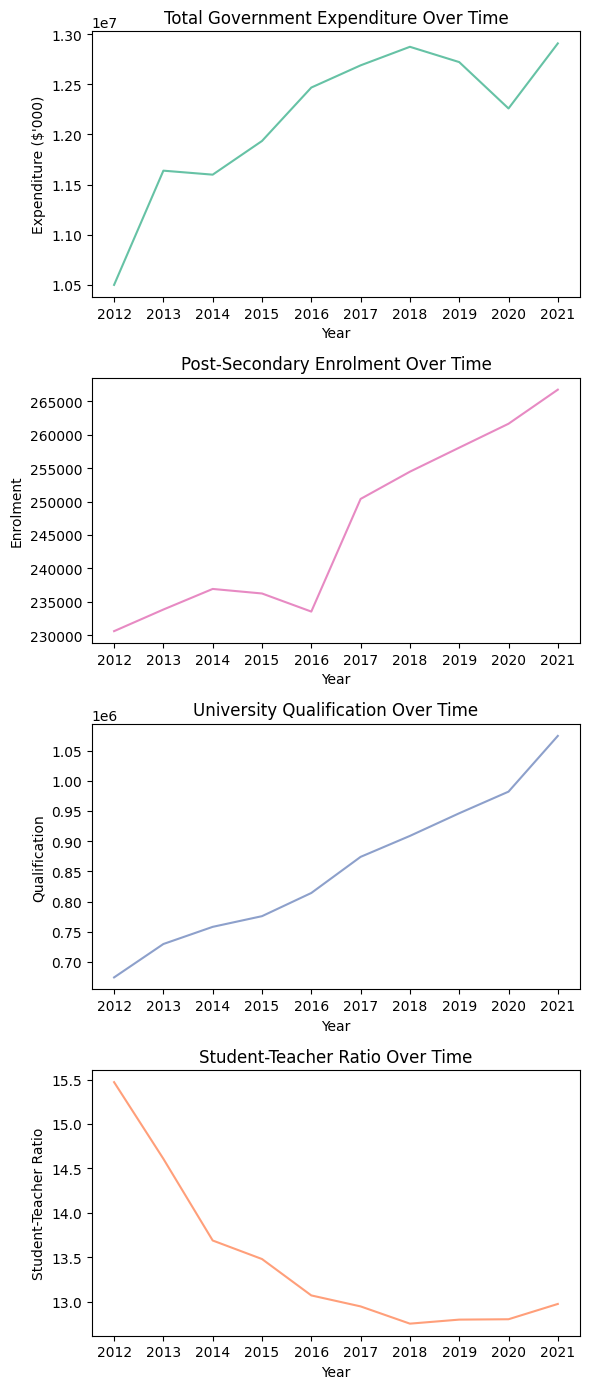

In [21]:
# Create a 4x1 grid of subplots
fig, axes = plt.subplots(4, 1, figsize=(6, 14))

# Plot total government expenditure
axes[0].plot(years, total_govt_exp, color='#66c2a5')
axes[0].set_title('Total Government Expenditure Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel("Expenditure ($'000)")

# Plot post-secondary enrolment
axes[1].plot(years, post_secondary_enrol, color='#e78ac3')
axes[1].set_title('Post-Secondary Enrolment Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Enrolment')

# Plot distribution of university qualification (highest)
axes[2].plot(years, uni_qualification, color='#8da0cb')
axes[2].set_title('University Qualification Over Time')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Qualification')

# Plot student-teacher ratio
axes[3].plot(years, student_teacher_ratio, color='#FF9F7A')
axes[3].set_title('Student-Teacher Ratio Over Time')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Student-Teacher Ratio')

plt.tight_layout()
plt.show()

I have chosen to prioritise post-secondary enrolment figures over total enrolment because the total enrolment figures are likely influenced by external factors such as declining birth rates, which are beyond the government's control. Focusing on post-secondary enrolment, which reflects intentional educational pursuits beyond compulsory schooling, allows for a more targeted analysis of the direct impact of government expenditure.

Additionally, I have opted to use the distribution of individuals with university as their highest qualification instead of other credentials because of the observed pattern where diploma & professional qualifications and post-secondary (non-tertiary) have the lowest distribution. As previously established, this suggests that individuals are more likely to pursue further education at the university level.

With that said, when government expenditure was at its lowest in 2012, post-secondary enrolment and individuals with university qualifications were also at their lowest, while the student-teacher ratio was at its highest. Conversely, when government expenditure reached its peak in 2021, post-secondary enrolment and individuals with university qualifications were also at their highest. The student-teacher ratio, while not at its lowest, was considerably lower than in 2012.

These observations suggest the following: a positive correlation between government education expenditure, post-secondary enrolment, and the number of individuals with university qualifications; and a negative correlation between government education expenditure and the student-teacher ratio. To confirm these relationships, I will conduct a regression analysis.

In [22]:
# Initialise the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the data for linear regression
total_govt_exp_reshaped = total_govt_exp.reshape(-1, 1)
post_secondary_enrol_reshaped = post_secondary_enrol.reshape(-1, 1)
uni_qualification_reshaped = uni_qualification.reshape(-1, 1)
student_teacher_ratio_reshaped = student_teacher_ratio.values.reshape(-1, 1)

# Normalise the data
total_govt_exp_normalised = scaler.fit_transform(total_govt_exp_reshaped)
post_secondary_enrol_normalised = scaler.fit_transform(post_secondary_enrol_reshaped)
uni_qualification_normalised = scaler.fit_transform(uni_qualification_reshaped)
student_teacher_ratio_normalised = scaler.fit_transform(student_teacher_ratio_reshaped)

What I did above is I prepared the variables for normalisation by reshaping them into two-dimensional arrays. Then, I used the MinMaxScaler's fit_transform method to scale the values of each variable between 0 and 1. 

This step ensures that all variables are on a consistent scale, making comparisons fair and eliminating biases stemming from differences in their original units or scales. Now on to visualisations:

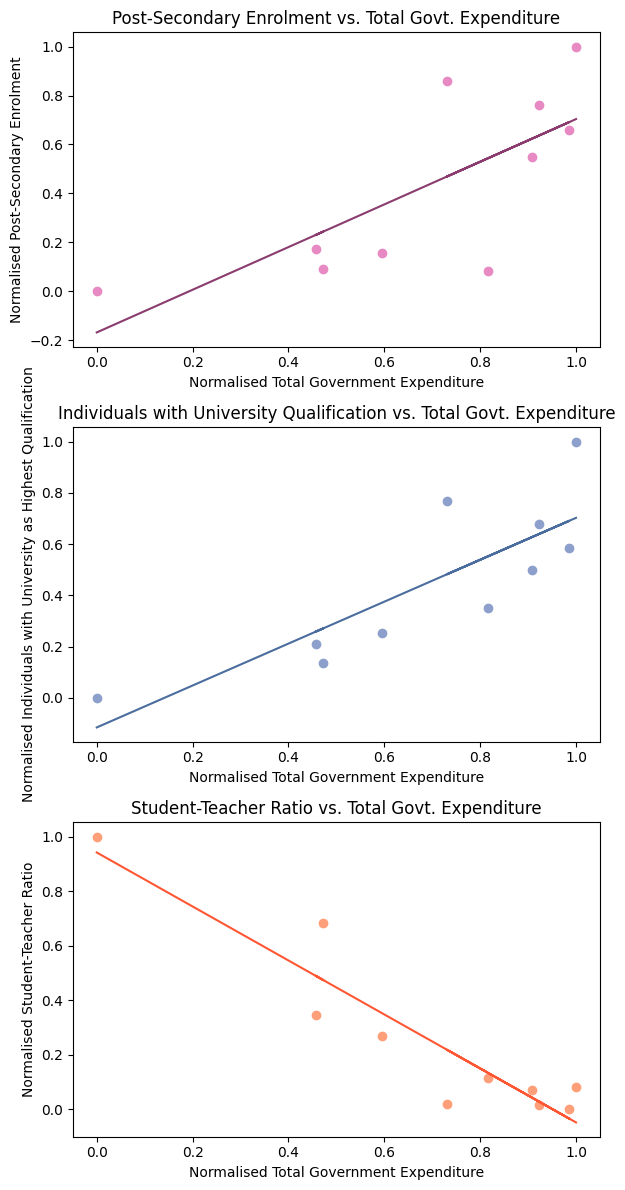

In [23]:
# Initialise linear regression model
model = LinearRegression()

# Fit the model for post-secondary enrolment
model.fit(total_govt_exp_normalised, post_secondary_enrol_normalised)
slope1, intercept1 = model.coef_[0][0], model.intercept_[0]

# Fit the model for university qualification
model.fit(total_govt_exp_normalised, uni_qualification_normalised)
slope2, intercept2 = model.coef_[0][0], model.intercept_[0]

# Fit the model for student-teacher ratio
model.fit(total_govt_exp_normalised, student_teacher_ratio_normalised)
slope3, intercept3 = model.coef_[0][0], model.intercept_[0]

# Visualise the data
fig, axes = plt.subplots(3, 1, figsize=(6.2, 12))

# Plot post-secondary enrolment
axes[0].scatter(total_govt_exp_normalised, post_secondary_enrol_normalised, color='#e78ac3')
axes[0].plot(total_govt_exp_normalised, slope1 * total_govt_exp_normalised + intercept1, color='#8a3c6e')
axes[0].set_title('Post-Secondary Enrolment vs. Total Govt. Expenditure')
axes[0].set_xlabel('Normalised Total Government Expenditure')
axes[0].set_ylabel('Normalised Post-Secondary Enrolment')

# Plot university qualification
axes[1].scatter(total_govt_exp_normalised, uni_qualification_normalised, color='#8da0cb')
axes[1].plot(total_govt_exp_normalised, slope2 * total_govt_exp_normalised + intercept2, color='#4b6d9e')
axes[1].set_title('Individuals with University Qualification vs. Total Govt. Expenditure')
axes[1].set_xlabel('Normalised Total Government Expenditure')
axes[1].set_ylabel('Normalised Individuals with University as Highest Qualification')

# Plot student-teacher ratio
axes[2].scatter(total_govt_exp_normalised, student_teacher_ratio_normalised, color='#FF9F7A')
axes[2].plot(total_govt_exp_normalised, slope3 * total_govt_exp_normalised + intercept3, color='#FF5733')
axes[2].set_title('Student-Teacher Ratio vs. Total Govt. Expenditure')
axes[2].set_xlabel('Normalised Total Government Expenditure')
axes[2].set_ylabel('Normalised Student-Teacher Ratio')

plt.tight_layout()
plt.show()

The positive slope observed for post-secondary enrolment implies a direct correlation with government expenditure: as government spending rises, so does post-secondary enrolment. 

Similarly, the positive slope for the number of individuals with university qualifications suggests a similar relationship: as government expenditure increases, the number of individuals tends to rise. 

Conversely, the negative slope for the student-teacher ratio indicates an inverse relationship with government expenditure: higher government spending correlates with a reduction in the student-teacher ratio.

### B. Impact of Government Education Expenditure on Economic Growth

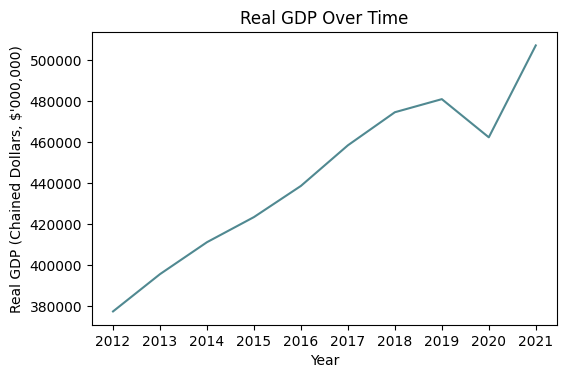

In [24]:
# Extract years and GDP values
years = real_gdp_data.columns[1:]
gdp_values = real_gdp_data.iloc[0, 1:].values

# Plot the data
plt.figure(figsize=(6, 3.8))
plt.plot(years, gdp_values, linestyle='-', color="#508991")
plt.title('Real GDP Over Time')
plt.xlabel('Year')
plt.ylabel("Real GDP (Chained Dollars, $'000,000)")
plt.show()

The above line plot illustrates a clear upward trend in real GDP over time, indicating overall economic growth. As expected, a significant deviation occurred in 2020, coinciding with the COVID-19 pandemic.

This dip in GDP reflects the widespread impact of the pandemic on various sectors of the economy, including manufacturing, services, and international trade. Nevertheless, there was a noticeable recovery in 2021, with real GDP reaching its peak.

As previously established, total government expenditure also exhibits a rising trajectory over time. Therefore, I will conduct a correlation analysis to investigate whether a relationship between government expenditure and real GDP exists.

In [25]:
# Perform correlation analysis
correlation_coefficient, p_value = pearsonr(gdp_values, total_govt_exp)

# Print the results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson Correlation Coefficient: 0.9175817266121972
P-value: 0.00018258235923644786


The Pearson correlation coefficient of approximately 0.918 suggests a strong positive linear relationship between real GDP and total government expenditure on education. This indicates that as government expenditure increases, real GDP tends to increase as well.

The p-value of approximately 0.000183 is less than the typical significance level of 0.05, indicating that the observed correlation is statistically significant. Therefore, we can reject the null hypothesis that there is no correlation between government expenditure and real GDP, and conclude that there is indeed a significant positive correlation between the two variables.

### C. Summary
The regression analysis on government education expenditure and educational indicators reveals the following trends: there is a positive relationship between post-secondary enrolment and government education expenditure. 

Similarly, the number of individuals who have attained a university degree shows a positive relationship with government expenditure. Conversely, there is an inverse relationship between student-teacher ratio and government expenditure. 

Real GDP is shown to have risen significantly from 2012 to 2021, along with the figures for total government expenditure on education. The correlation analysis conducted on these two variables indicates a statistically significant positive linear relationship.

## 6. Conclusion
Government spending on education has consistently increased over the years, with recent emphasis on recurrent expenditure over development expenditure, particularly in post-secondary institutions. This strategic shift aims to maintain existing infrastructure and programmes while enhancing education quality and accessibility, therefore motivating individuals to pursue further studies beyond the secondary level.

While total enrolment experienced a decline since 2012, post-secondary enrolments have steadily increased. This upward trend is further supported by the rising number of individuals attaining university qualifications. Additionally, the trend is complemented by the decrease in the student-teacher ratio, indicating potential improvements in resource allocation and increased individual attention.

These improvements in educational indicators suggest positive outcomes from the increase in total government expenditure on education; more specifically, the government's focused spending on post-secondary institutions. Regression analysis confirms a positive relationship between government expenditure and post-secondary enrolment, as well as between government expenditure and the number of individuals with university as their highest education level. Additionally, there is a negative relationship between government expenditure and the student-teacher ratio.

These relationships mean that increased government expenditure correlates with higher enrolment in post-secondary institutions, a greater likelihood of individuals pursuing further education at the university level, and a reduction in students to teachers. These educational advancements most likely have a positive impact on the economy, as a well-educated workforce promotes contribution to innovation and technological advancements. Indeed, Real GDP has shown substantial growth over the past decade, indicating a positive correlation between education spending and economic prosperity.

Correlation analysis confirms this with the correlation coefficient and p-value indicating a statistically significant positive linear relationship between government education expenditure and real GDP, thus highlighting the role of increased spending in driving economic growth. In conclusion, investing in education positively affects educational outcomes and, consequently, Singapore's economic development, aligning with my initial hypothesis.

## 7. Further Reading
Organisation for Economic Co-operation and Development. (2010). *Singapore: Rapid Improvement Followed by Strong Performance*. https://www.oecd.org/countries/singapore/46581101.pdf

Singapore Department of Statistics. (2023). *Government Expenditure On Education* [Table]. SingStat Table Builder. https://tablebuilder.singstat.gov.sg/table/TS/M850011

Singapore Department of Statistics. (2023). *Students And Teachers In Educational Institutions* [Table]. SingStat Table Builder. https://tablebuilder.singstat.gov.sg/table/TS/M850261

Singapore Department of Statistics. (2024). *Enrolment In Educational Institutions* [Table]. SingStat Table Builder. https://tablebuilder.singstat.gov.sg/table/TS/M850251

Singapore Department of Statistics. (2024). *Gross Domestic Product In Chained (2015) Dollars, By Industry (SSIC 2020)* [Table]. SingStat Table Builder. https://tablebuilder.singstat.gov.sg/table/TS/M015721

Singapore Department of Statistics. (2024). *Singapore Residents Aged 25 Years & Over By Highest Qualification Attained, Sex And Age Group* [Table]. SingStat Table Builder. https://tablebuilder.singstat.gov.sg/table/TS/M850581